<a href="https://colab.research.google.com/github/AdamTMU/CIND820/blob/main/Capstone_Project_CIND820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing Libraries

In [72]:
#Install necessary packages
!pip install ucimlrepo

# Import the necessary libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

# Retrieving Dataset

In [36]:
# fetch dataset
dataset = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
X['target'] = heart_disease.data.targets

# Descriptive Statistics

In [3]:
# variable information
print(heart_disease.variables)

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [4]:
#Looking at first 10 rows of data
heart_disease.data.features.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [5]:
#"ca" and "thal" have missing values
print(X['ca'].unique())
print(X['thal'].unique())

[ 0.  3.  2.  1. nan]
[ 6.  3.  7. nan]


In [34]:
#Drop "nan" values
X.dropna(subset=['ca', 'thal'], inplace=True)
print(X.shape)
print(X.isnull().sum())

(297, 13)
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


<ipython-input-34-246dd1410305>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(subset=['ca', 'thal'], inplace=True)


<Axes: >

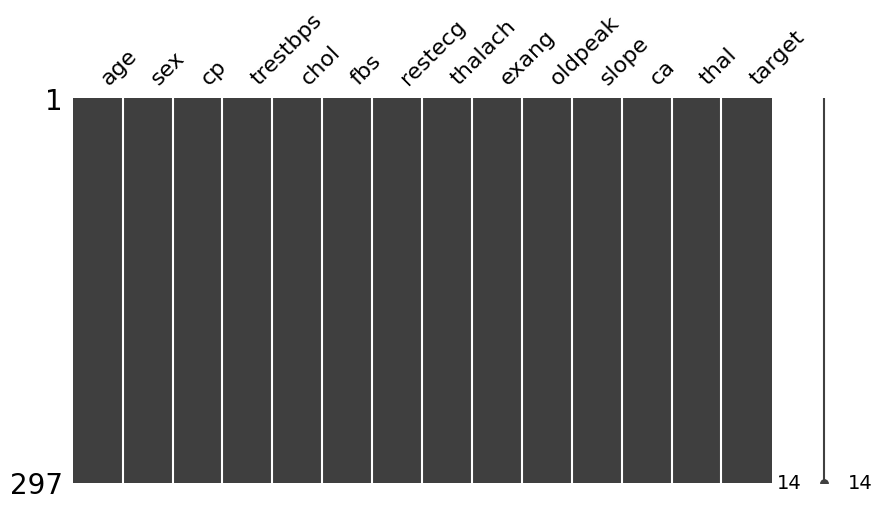

In [7]:
#Visualizing missing data
!pip install missingno
import missingno as msno
msno.matrix(X, figsize=(10, 5))


Descriptive Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    1.602694    0.676768   
st

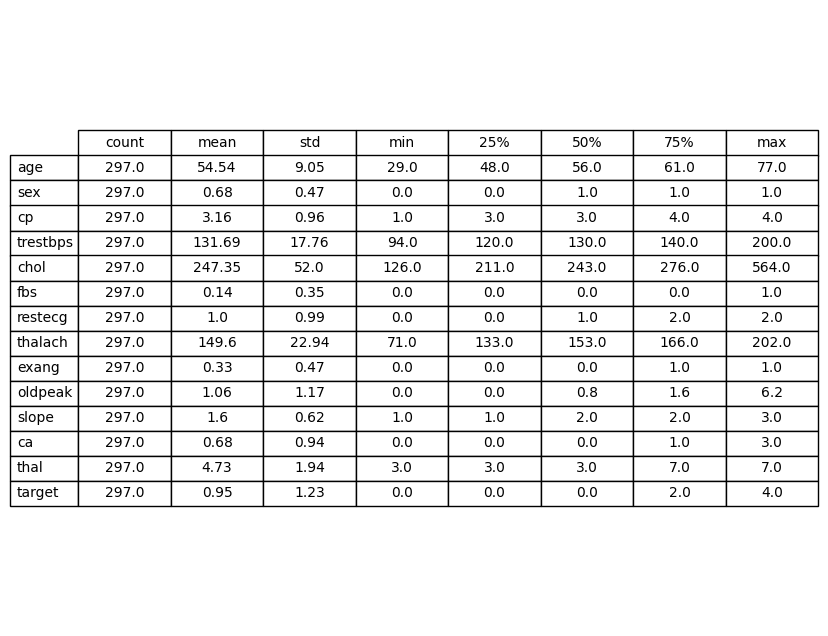

In [8]:
# Descriptive statistics for features
descriptive_stats = X.describe(include='all')
print("\nDescriptive Statistics:")
print(descriptive_stats)
#Round the numbers
descriptive_stats = descriptive_stats.round(2)
# Set up the matplotlib figure
plt.figure(figsize=(14, 8))  # Increased figure size

# Create a table for descriptive statistics
plt.subplot(121)  # 1 row, 2 columns, 1st subplot
plt.axis('tight')
plt.axis('off')
table_data = descriptive_stats.T  # Transpose for better display
table = plt.table(cellText=table_data.values,
                  colLabels=table_data.columns,
                  rowLabels=table_data.index,
                  cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)  # Increased scale for better visibility

# Correlation Matrix


Correlation Matrix:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.092399  0.110471  0.290476  0.202644  0.132062   
sex      -0.092399  1.000000  0.008908 -0.066340 -0.198089  0.038850   
cp        0.110471  0.008908  1.000000 -0.036980  0.072088 -0.057663   
trestbps  0.290476 -0.066340 -0.036980  1.000000  0.131536  0.180860   
chol      0.202644 -0.198089  0.072088  0.131536  1.000000  0.012708   
fbs       0.132062  0.038850 -0.057663  0.180860  0.012708  1.000000   
restecg   0.149917  0.033897  0.063905  0.149242  0.165046  0.068831   
thalach  -0.394563 -0.060496 -0.339308 -0.049108 -0.000075 -0.007842   
exang     0.096489  0.143581  0.377525  0.066691  0.059339 -0.000893   
oldpeak   0.197123  0.106567  0.203244  0.191243  0.038596  0.008311   
slope     0.159405  0.033345  0.151079  0.121172 -0.009215  0.047819   
ca        0.362210  0.091925  0.235644  0.097954  0.115945  0.152086   
thal      0.126586  0.383652  0.268500  0.1

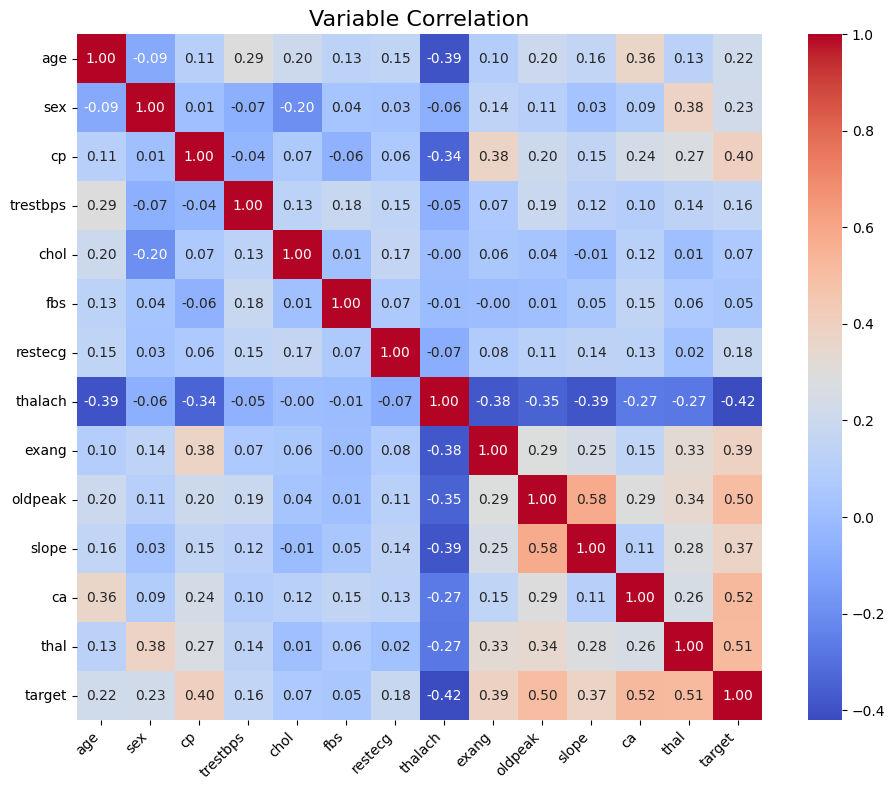

In [9]:
# Correlation matrix for features
correlation_matrix = X.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

# Title and labels
plt.title('Variable Correlation', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better visibility
plt.yticks(rotation=0)  # Keep y labels horizontal

# Show the plot
plt.tight_layout()
plt.show()

In [10]:
duplicated_rows = X[X.duplicated()]
print("Number of duplicated rows:", len(duplicated_rows))

Number of duplicated rows: 0


# Tentative Methodology

In [11]:
# Tentative methology flowchart
!pip install graphviz
from graphviz import Digraph
from graphviz import Digraph

# Create a new directed graph
flowchart = Digraph()

# Define the nodes with colors
flowchart.node('A', 'Data Collection: Heart Disease Dataset', style='filled', fillcolor='lightblue')
flowchart.node('B', 'Data Preprocessing', style='filled', fillcolor='lightblue')
flowchart.node('C', 'Significant Feature Selection', style='filled', fillcolor='lightblue')
flowchart.node('D', 'Model Selection: Training and Testing Sets', style='filled', fillcolor='lightblue')
flowchart.node('E', 'Model Training', style='filled', fillcolor='lightblue')
flowchart.node('F', 'Model Evaluation', style='filled', fillcolor='lightblue')
flowchart.node('G', 'Model Interpretation', style='filled', fillcolor='lightblue')
flowchart.node('H', 'Deployment:Key Findings', style='filled', fillcolor='lightblue')

# Define the edges (connections between nodes)
flowchart.edge('A', 'B')
flowchart.edge('B', 'C')
flowchart.edge('C', 'D')
flowchart.edge('D', 'E')
flowchart.edge('E', 'F')
flowchart.edge('F', 'G')
flowchart.edge('G', 'H')

# Render the flowchart to a file (e.g., PNG)
flowchart.render('colored_flowchart', format='png', cleanup=True)

'colored_flowchart.png'

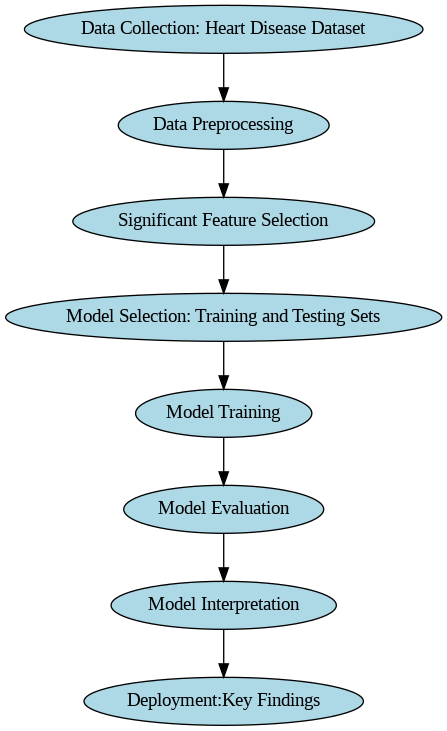

In [12]:
from IPython.display import Image

# Display the flowchart
Image('colored_flowchart.png')

# Machine Learning Modelling

In this section I will compare different classification models.
I will split the dataset into training (80%) and testing (20%) subsets

**Logistic Regression**

In [105]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1905)

# Impute missing values with the mean of each column before scaling
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
X_train = imputer.fit_transform(X_train) # Fit and transform on training data
X_test = imputer.transform(X_test) # Transform the test data using the trained imputer

# Scale features using StandardScaler
scaler = StandardScaler() # Create a scaler instance
X_train = scaler.fit_transform(X_train) # Fit and transform on training data
X_test = scaler.transform(X_test) # Transform the test data using the trained scaler

# Training model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Evaluate the model on the test set
print("Test Accuracy: {:.2f}%".format(lr.score(X_test, y_test) * 100))

Test Accuracy: 62.30%


**Normalization**

**Naive Bayes Algorithm**

In [104]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_score = nb.score(X_test,y_test)
print("Accuracy of Naive Bayes: {:.2f}%".format(nb_score*100))

Accuracy of Naive Bayes: 55.74%


**Support Vector Machine (SVM) Algorithm**

In [101]:
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)
svm_score = svm.score(X_test,y_test)
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(svm_score*100))

Test Accuracy of SVM Algorithm: 54.10%


**Decision Tree Algorithm**

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, # Removed .drop since 'target' is likely in y
                                   y, # target (Y)
                                   test_size = .2, # %80 train %20 test
                                   random_state=1905)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

dtc_score = dtc.score(X_test, y_test)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc_score*100))

Decision Tree Test Accuracy 44.26%


**K-Nearest Neighbour (KNN) Classification**

In [87]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data and transform it
X_normalized = scaler.fit_transform(X) # Normalize X and assign to X_normalized

# Now proceed with the train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                   X_normalized, # target hariç veri setinin tamamı (X)
                                   y, # target (Y)
                                   test_size = .2, # %80 train %20 test olmak üzere ayırdık.
                                   random_state=1905)
# KNN Model
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

knn_score = knn.score(X_test, y_test)
print("{} NN Score: {:.2f}%".format(knn.n_neighbors, knn_score*100))

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values